## Homework 3
#### Due Saturday October 5 by 11:59pm on Gradescope

Please import the following package.

In [1]:
import numpy as np

### Storage

**_How to compress an array with lots of zeros_**

Suppose we have an array `np.array([[1,0], [0,4]])`. We could store the indices of non-zero entries (namely (0,0) and (1,1)) and the values of non-zero entries (namely 1 and 4) in a dictionary. Instead we will encode the non-zero entries with three arrays
        
* `nonzero_values` :  The nonzero entries in row major order. For example `np.array([1,4])`
* `nonzero_values_column` :  The columns of each non-zero entry. For example `np.array([0,1])`
* `nonzero_values_count` :  The cumulative count of non-zero entries in each row. Here the entry with index $i$th corresponds to rows 0 through $i-1$. For example `np.array([0,1,2])`.

Consider a function called `dense_to_sparse` that inputs an array and outputs `nonzero_values`, `nonzero_values_column`, and `nonzero_values_count` together as a tuple.  

a. Write pseudo-code for `dense_to_sparse`

PSEUDO-CODE:

def dense_to_sparse(arr):

    build three lists:
        nonzero_values 
        nonzero_values_column
        nonzero_values_count, which starts at 0

    start counter at 0
    for each row in arr:
        for col in arr:
            if value != 0:
                append value to nonzero_values
                append col number to nonzero_values_column
                add 1 to counter 
         append the counter to nonzero_values_count (by row)

    return the three lists in a tuple

b. Write code for `dense_to_sparse`

In [2]:
# Implement this
def dense_to_sparse(arr):
    
    '''
    dense_to_sparse takes an array input and outputs three arrays in a tuple: 
        nonzero_values : The nonzero entries in row major order. 
        nonzero_values_column : The columns of each non-zero entry. 
        nonzero_values_count : The cumulative count of non-zero entries in each row.
        
    arr: a np.array to be transformed
    '''
    
    nonzero_values = []
    nonzero_values_column = []
    nonzero_values_count = [0]

    row, col = arr.shape

    counter=0
    for i in range(row):
        for j in range(col):
            if arr[i,j] != 0:
                nonzero_values.append(arr[i,j])
                nonzero_values_column.append(j)
                counter+=1
        nonzero_values_count.append(counter)


    return (nonzero_values, nonzero_values_column, nonzero_values_count)
    raise NotImplementedError("An error occurred. Is your input an array?")

In [3]:
#test the function
arr = np.array([[1,2,0],[0,0,0], [3,0,4], [0,0,5]])
dense_to_sparse(arr)

([1, 2, 3, 4, 5], [0, 1, 0, 2, 2], [0, 2, 2, 4, 5])

Consider a function called `sparse_to_dense` that reverses `dense_to_sparse`. The function has five inputs: three arrays (`nonzero_values`, `nonzero_values_column`, `nonzero_values_count`) along with two integers (the number of rows and columns). The output is the original matrix. For example,

`sparse_to_dense(np.array([1,4]), np.array([0,1]), np.array([0,1,2]), 2, 2)` 

is `np.array([[1,0], [0,4]])`.

c. Write pseudo-code for `sparse_to_dense`

PSEUDO-CODE HERE

def sparse_to_dense(arr1, arr2, arr3, nrows, ncols):

    num_per_row = pair the values in arr3 and compute the differences
    
    new_arr = an empty array with given nrows, ncols dimensions

    start counter at 0
    for each index, value pair:
        for each value:
            update the new_arr with value in corresponding position count
            add 1 to counter
        
    return new_arr

d. Write code for `sparse_to_dense`

In [4]:
# Implement this, including modifying argument names
def sparse_to_dense(arr1, arr2, arr3, nrows, ncols):
    
    '''
    sparse_to_dense takes three array input arrays and outputs one dense array
        
    arr1 : The nonzero entries in row major order. 
    arr2 : The columns of each non-zero entry. 
    arr3 : The cumulative count of non-zero entries in each row.
    nrows : Output number of rows desired
    ncols : Output number of columns desired
    '''
    num_per_row = [y-x for x, y in zip(arr3, arr3[1:])]
    
    new_arr = np.zeros((nrows, ncols))
    
    k=0
    for i, n in enumerate(num_per_row): #index and value
        for j in range(n):
            new_arr[i][arr2[k]]=arr1[k]
            k+=1
            
    return new_arr

    raise NotImplementedError("An error occurred. Did you input 3 arrays and a specified shape?")

In [5]:
#test the function
sparse_to_dense(np.array([1,4]), np.array([0,1]), np.array([0,1,2]), 2, 2)

array([[1., 0.],
       [0., 4.]])

### Classes 

**_How to resuse code through inheritance_**

<img src="img.png" alt="drawing" width="200" style="float:right"/>

We want to use organize the different approaches to storing the data in arrays. 

e. Create a class called `GenericMatrix` with two instance attributes
 - `self.number_rows` storing the number of rows
 - `self.number_columns` storing the number of columns

In [6]:
# Implement this
class GenericMatrix:
    def __init__(self, nrows, ncols):
        self.number_rows = nrows
        self.number_columns = ncols
        #raise NotImplementedError()

#test
#gsm=GenericMatrix(4,5)
#print(gsm.number_rows)

f. Create a subclass of `GenericMatrix` called `DenseMatrix` with 
 - instance attribute `self.data` storing the numpy array
 - constructor `__init__` that sets `self.data` along with `self.number_rows`, `self.number_columns` in the superclass

In [7]:
# Implement this
class DenseMatrix(GenericMatrix):
    def __init__(self, nrows, ncols, data):
        super().__init__(nrows, ncols)
        self.data = data
        #raise NotImplementedError

#test
#dm=DenseMatrix(4,5,np.array([[1,0], [0,4]]))
#dm.data

g. Create a subclass of `GenericMatrix` called `GenericSparseMatrix` with 
 - constructor `__init__` that sets `self.number_rows`, `self.number_columns` in the superclass

In [8]:
# Implement this
class GenericSparseMatrix(GenericMatrix):
    pass # GenericMatrix = GenericSparseMatrix as we are just assigning rows and columns
    #raise NotImplementedError()

#test 
#gsm = GenericSparseMatrix(4,4)
#isinstance(gsm, GenericMatrix)

h. Create two subclasses of `GenericSparseMatrix` called `CSR` and `KeyValue`. Here `CSRMatrix` has 
 - instance attributes:
    1. `nonzero_values`
    2. `nonzero_values_column`
    3. `nonzero_values_count`
 - instance method `dense_to_sparse(self, arr)` (tip: use Question b)
 - constructor `__init__` that sets the three data attributes above using `dense_to_sparse(self, arr)` along with `self.number_rows`, `self.number_columns` in the superclass
 
Here `KeyValueMatrix` has 
 - instance attribute `self.data_dict` a dictionary mapping coordinates to non-zero values
 - instance method `dense_to_sparse(self, arr)` (tip: use Homework 2, Q4)
 - constructor `__init__` that sets `self.data_dict` using `dense_to_sparse(self, arr)` along with `self.number_rows`, `self.number_columns` in the superclass

In [9]:
# Implement this
class CSRMatrix(GenericSparseMatrix):
    def __init__(self, nrows, ncols, data):
        super().__init__(nrows, ncols)
        self.nonzero_values=None
        self.nonzero_values_column=None
        self.nonzero_values_count=None
        self.dense_to_sparse(data) 
        #raise NotImplementedError
        
    def dense_to_sparse(self, arr):
        #self.nonzero_values, self.nonzero_values_column, self.nonzero_values_count = dense_to_sparse(arr)
        nonzero_values = []
        nonzero_values_column = []
        nonzero_values_count = [0]

        row, col = arr.shape

        counter=0
        for i in range(row):
            for j in range(col):
                if arr[i,j] != 0:
                    nonzero_values.append(arr[i,j])
                    nonzero_values_column.append(j)
                    counter+=1
            nonzero_values_count.append(counter)

        self.nonzero_values, self.nonzero_values_column, self.nonzero_values_count = (nonzero_values, nonzero_values_column, nonzero_values_count)
        #raise NotImplementedError

class KeyValueMatrix(GenericSparseMatrix):
    def __init__(self, nrows, ncols, data_dict):
        super().__init__(nrows, ncols)
        self.dense_to_sparse(data_dict)
        #raise NotImplementedError
        
    def dense_to_sparse(self, arr):
        row, col = arr.shape
        dicts={}
        for i in range(row):
            for j in range(col):
                if arr[i,j] != 0:
                    dicts.update({(i, j):arr[i,j]})
        self.data_dict = dicts
        #raise NotImplementedError

In [10]:
#test
#test=CSRMatrix(4,5,np.array([[1,2,0],[0,0,0], [3,0,4], [0,0,5]]))
#print(test.nonzero_values)

#test=KeyValueMatrix(2,2,np.array([[1,2,0],[0,0,0], [3,0,4], [0,0,5]]))
#print(test.data_dict)

i. Draw a diagram in Unified Modeling Language representing the classes and the inheritance between classes.

In [11]:
#<img src="img2.png" alt="drawing"/>

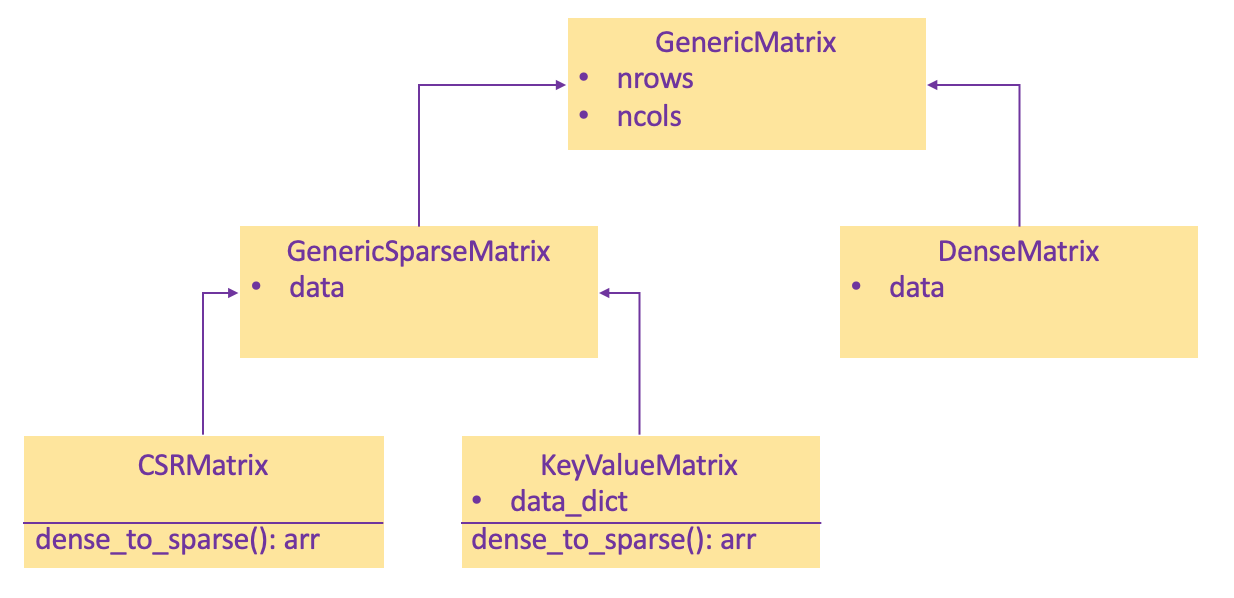

In [12]:
from IPython.display import Image
Image(filename='img2.png')